# Introduction to Bioconductor (2)

## Antonio Mora

Lab workshop, 21-06-2019

# Part 1. Working with annotation:

Let's start by installing the required packages for today's workshop.

In [88]:
BiocManager::install(c("AnnotationDbi", "hgu95av2.db", "org.Hs.eg.db", "GO.db", "EnsDb.Hsapiens.v75", "AnnotationHub", "rtracklayer", "BSgenome.Hsapiens.UCSC.hg38", "Gviz"))

Bioconductor version 3.9 (BiocManager 1.30.4), R 3.6.0 (2019-04-26)
Installing package(s) 'AnnotationDbi', 'hgu95av2.db', 'org.Hs.eg.db', 'GO.db',
  'EnsDb.Hsapiens.v75', 'AnnotationHub', 'rtracklayer',
  'BSgenome.Hsapiens.UCSC.hg38', 'Gviz'
Warning message:
"packages 'AnnotationDbi', 'AnnotationHub', 'rtracklayer', 'Gviz' are in use and will not be installed"installing the source packages 'hgu95av2.db', 'org.Hs.eg.db', 'GO.db', 'EnsDb.Hsapiens.v75', 'BSgenome.Hsapiens.UCSC.hg38'

Update old packages: 'BiocParallel'


## 1.1) AnnotationDbi:

As explained in the slides, AnnotationDb objects have been used on several different databases, therefore they are the basis of ChipDb objects, OrgDb objects, GO.db, and TxDb objects, among others. All these objects can be accessed using the same four basic methods: "columns", "keytypes", "keys", and "select".

_ChipDb objects:_

In [3]:
library(hgu95av2.db, verbose=FALSE)

We can list all objects in the package.

In [4]:
ls("package:hgu95av2.db")

[1] "hgu95av2"              "hgu95av2.db"           "hgu95av2_dbconn"      
 [4] "hgu95av2_dbfile"       "hgu95av2_dbInfo"       "hgu95av2_dbschema"    
 [7] "hgu95av2ACCNUM"        "hgu95av2ALIAS2PROBE"   "hgu95av2CHR"          
[10] "hgu95av2CHRLENGTHS"    "hgu95av2CHRLOC"        "hgu95av2CHRLOCEND"    
[13] "hgu95av2ENSEMBL"       "hgu95av2ENSEMBL2PROBE" "hgu95av2ENTREZID"     
[16] "hgu95av2ENZYME"        "hgu95av2ENZYME2PROBE"  "hgu95av2GENENAME"     
[19] "hgu95av2GO"            "hgu95av2GO2ALLPROBES"  "hgu95av2GO2PROBE"     
[22] "hgu95av2MAP"           "hgu95av2MAPCOUNTS"     "hgu95av2OMIM"         
[25] "hgu95av2ORGANISM"      "hgu95av2ORGPKG"        "hgu95av2PATH"         
[28] "hgu95av2PATH2PROBE"    "hgu95av2PFAM"          "hgu95av2PMID"         
[31] "hgu95av2PMID2PROBE"    "hgu95av2PROSITE"       "hgu95av2REFSEQ"       
[34] "hgu95av2SYMBOL"        "hgu95av2UNIGENE"       "hgu95av2UNIPROT"

And check what kind of objects are they:

In [5]:
class(hgu95av2GENENAME)

[1] "ProbeAnnDbBimap"
attr(,"package")
[1] "AnnotationDbi"

The main object is the one with the name of the package. We can see its contents with "columns":

In [6]:
columns(hgu95av2.db)

[1] "ACCNUM"       "ALIAS"        "ENSEMBL"      "ENSEMBLPROT"  "ENSEMBLTRANS"
 [6] "ENTREZID"     "ENZYME"       "EVIDENCE"     "EVIDENCEALL"  "GENENAME"    
[11] "GO"           "GOALL"        "IPI"          "MAP"          "OMIM"        
[16] "ONTOLOGY"     "ONTOLOGYALL"  "PATH"         "PFAM"         "PMID"        
[21] "PROBEID"      "PROSITE"      "REFSEQ"       "SYMBOL"       "UCSCKG"      
[26] "UNIGENE"      "UNIPROT"

"keytypes" will tells us which fields we can use as queries for the database (sometimes they could be all the coolumns; sometimes, less):

In [7]:
keytypes(hgu95av2.db)

[1] "ACCNUM"       "ALIAS"        "ENSEMBL"      "ENSEMBLPROT"  "ENSEMBLTRANS"
 [6] "ENTREZID"     "ENZYME"       "EVIDENCE"     "EVIDENCEALL"  "GENENAME"    
[11] "GO"           "GOALL"        "IPI"          "MAP"          "OMIM"        
[16] "ONTOLOGY"     "ONTOLOGYALL"  "PATH"         "PFAM"         "PMID"        
[21] "PROBEID"      "PROSITE"      "REFSEQ"       "SYMBOL"       "UCSCKG"      
[26] "UNIGENE"      "UNIPROT"

To start a query, we must choose some "keys". For example:

In [8]:
head(keys(hgu95av2.db, keytype="SYMBOL"))

[1] "A1BG"  "A2M"   "A2MP1" "NAT1"  "NAT2"  "NATP"

Finally, we get our information using "select":

In [9]:
myKeys = keys(hgu95av2.db,keytype="PROBEID")[1:10]
select(hgu95av2.db, keys=myKeys, columns=c("SYMBOL","GENENAME"), keytype="PROBEID")

'select()' returned 1:many mapping between keys and columns


PROBEID,SYMBOL,GENENAME
<chr>,<chr>,<chr>
1000_at,MAPK3,mitogen-activated protein kinase 3
1001_at,TIE1,tyrosine kinase with immunoglobulin like and EGF like domains 1
1002_f_at,CYP2C19,cytochrome P450 family 2 subfamily C member 19
1003_s_at,CXCR5,C-X-C motif chemokine receptor 5
1004_at,CXCR5,C-X-C motif chemokine receptor 5
1005_at,DUSP1,dual specificity phosphatase 1
1006_at,MMP10,matrix metallopeptidase 10
1007_s_at,DDR1,discoidin domain receptor tyrosine kinase 1
1007_s_at,MIR4640,microRNA 4640


Where can you see a 1:many mapping example?

"_mapIds_" is useful if we only need to extract one column:

In [10]:
mapIds(hgu95av2.db, keys=myKeys, column=c("GENENAME"), keytype="PROBEID")

'select()' returned 1:many mapping between keys and columns


1000_at 
                             "mitogen-activated protein kinase 3" 
                                                          1001_at 
"tyrosine kinase with immunoglobulin like and EGF like domains 1" 
                                                        1002_f_at 
                 "cytochrome P450 family 2 subfamily C member 19" 
                                                        1003_s_at 
                               "C-X-C motif chemokine receptor 5" 
                                                          1004_at 
                               "C-X-C motif chemokine receptor 5" 
                                                          1005_at 
                                 "dual specificity phosphatase 1" 
                                                          1006_at 
                                     "matrix metallopeptidase 10" 
                                                        1007_s_at 
                    "discoidin domain receptor tyrosine kinase 1" 
                                                        1008_f_at 
      "eukaryotic translation initiation factor 2 alpha kinase 2" 
                                                          1009_at 
                   "histidine triad nucleotide binding protein 1"

_OrgDb objects:_

Exactly the same steps can be followed using an OrgDb object:

In [11]:
library(org.Hs.eg.db, verbose=FALSE)
columns(org.Hs.eg.db)
keytypes(org.Hs.eg.db)

[1] "ACCNUM"       "ALIAS"        "ENSEMBL"      "ENSEMBLPROT"  "ENSEMBLTRANS"
 [6] "ENTREZID"     "ENZYME"       "EVIDENCE"     "EVIDENCEALL"  "GENENAME"    
[11] "GO"           "GOALL"        "IPI"          "MAP"          "OMIM"        
[16] "ONTOLOGY"     "ONTOLOGYALL"  "PATH"         "PFAM"         "PMID"        
[21] "PROSITE"      "REFSEQ"       "SYMBOL"       "UCSCKG"       "UNIGENE"     
[26] "UNIPROT"

[1] "ACCNUM"       "ALIAS"        "ENSEMBL"      "ENSEMBLPROT"  "ENSEMBLTRANS"
 [6] "ENTREZID"     "ENZYME"       "EVIDENCE"     "EVIDENCEALL"  "GENENAME"    
[11] "GO"           "GOALL"        "IPI"          "MAP"          "OMIM"        
[16] "ONTOLOGY"     "ONTOLOGYALL"  "PATH"         "PFAM"         "PMID"        
[21] "PROSITE"      "REFSEQ"       "SYMBOL"       "UCSCKG"       "UNIGENE"     
[26] "UNIPROT"

In this case, we can extract the gene symbol and the KEGG pathway for a given UniProt ID:

In [12]:
uniKeys <- head(keys(org.Hs.eg.db, keytype="UNIPROT"))
select(org.Hs.eg.db, keys=uniKeys, columns=c("SYMBOL", "PATH"), keytype="UNIPROT")

'select()' returned 1:many mapping between keys and columns


UNIPROT,SYMBOL,PATH
<chr>,<chr>,<chr>
P04217,A1BG,NA
V9HWD8,A1BG,NA
P01023,A2M,04610
P18440,NAT1,00232
P18440,NAT1,00983
P18440,NAT1,01100
Q400J6,NAT1,00232
Q400J6,NAT1,00983
Q400J6,NAT1,01100


_GO.db object:_

Finally, we can do the same with the GO database object:

In [13]:
library(GO.db, verbose=FALSE)
columns(GO.db)
keytypes(GO.db)

[1] "DEFINITION" "GOID"       "ONTOLOGY"   "TERM"

[1] "DEFINITION" "GOID"       "ONTOLOGY"   "TERM"

In [14]:
GOIDs <- c("GO:0042254","GO:0044183")
select(GO.db, keys=GOIDs, columns="DEFINITION", keytype="GOID")

'select()' returned 1:1 mapping between keys and columns


GOID,DEFINITION
<chr>,<chr>
GO:0042254,"A cellular process that results in the biosynthesis of constituent macromolecules, assembly, and arrangement of constituent parts of ribosome subunits; includes transport to the sites of protein synthesis."
GO:0044183,Interacting selectively and non-covalently with any protein or protein complex (a complex of two or more proteins that may include other nonprotein molecules) that contributes to the process of protein folding.


## Exercises:

1) Get a table with a gene list with transcriptomics results (example from AnotationDbi package) and add annotation using org.Hs.eg.db.

First, we get the gene list:

In [16]:
load(system.file("extdata", "resultTable.Rda", package="AnnotationDbi"))
head(resultTable)

,logConc,logFC,LR.statistic,PValue,FDR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
100418920,-9.639471,-4.679498,378.0732,3.269307e-84,2.613484e-80
100419779,-10.638865,-4.264830,291.1028,2.859424e-65,1.142912e-61
100271867,-11.448981,-4.009603,222.3653,2.757135e-50,7.346846e-47
100287169,-11.026699,-3.486593,206.7771,6.934967e-47,1.385953e-43
100287735,-11.036862,3.064980,204.1235,2.630432e-46,4.205535e-43
100421986,-12.276297,-4.695736,190.5368,2.427556e-43,3.234314e-40


Now, we find the annotation we want to add:

In [17]:
annots <- select(org.Hs.eg.db, keys=rownames(resultTable),columns=c("SYMBOL","GENENAME"), keytype="ENTREZID")
head(annots)

'select()' returned 1:1 mapping between keys and columns


ENTREZID,SYMBOL,GENENAME
<chr>,<chr>,<chr>
100418920,ACTG1P13,actin gamma 1 pseudogene 13
100419779,LOC100419779,zinc finger protein 195 pseudogene
100271867,MPVQTL1,Mean platelet volume QTL1
100287169,NA,NA
100287735,TTTY13B,"testis-specific transcript, Y-linked 13B"
100421986,NA,NA


Finally, we merge the annotation with our table:

In [18]:
resultTable <- merge(resultTable, annots, by.x=0, by.y="ENTREZID")
head(resultTable)

Row.names,logConc,logFC,LR.statistic,PValue,FDR,SYMBOL,GENENAME
<I<chr>>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
100127888,-10.57050,2.758937,182.8937,1.131473e-41,1.130624e-38,SLCO4A1-AS1,SLCO4A1 antisense RNA 1
100131223,-12.37808,-4.654318,179.2331,7.126423e-41,6.329847e-38,LOC100131223,ADP ribosylation factor like GTPase 8B pseudogene
100271381,-12.06340,3.511937,188.4824,6.817155e-43,7.785191e-40,RPS28P8,ribosomal protein S28 pseudogene 8
100271867,-11.44898,-4.009603,222.3653,2.757135e-50,7.346846e-47,MPVQTL1,Mean platelet volume QTL1
100287169,-11.02670,-3.486593,206.7771,6.934967e-47,1.385953e-43,NA,NA
100287735,-11.03686,3.064980,204.1235,2.630432e-46,4.205535e-43,TTTY13B,"testis-specific transcript, Y-linked 13B"


2) Another AnnotationDb package is EnsDb (Ensemble). Explore it, using the four basic commands.

In [21]:
library(EnsDb.Hsapiens.v75, verbose=FALSE)
columns(EnsDb.Hsapiens.v75)
keytypes(EnsDb.Hsapiens.v75)

Loading required package: ensembldb
Loading required package: GenomicRanges
Loading required package: GenomeInfoDb
Loading required package: GenomicFeatures
Loading required package: AnnotationFilter

Attaching package: 'ensembldb'

The following object is masked from 'package:stats':

    filter



[1] "ENTREZID"            "EXONID"              "EXONIDX"            
 [4] "EXONSEQEND"          "EXONSEQSTART"        "GENEBIOTYPE"        
 [7] "GENEID"              "GENENAME"            "GENESEQEND"         
[10] "GENESEQSTART"        "INTERPROACCESSION"   "ISCIRCULAR"         
[13] "PROTDOMEND"          "PROTDOMSTART"        "PROTEINDOMAINID"    
[16] "PROTEINDOMAINSOURCE" "PROTEINID"           "PROTEINSEQUENCE"    
[19] "SEQCOORDSYSTEM"      "SEQLENGTH"           "SEQNAME"            
[22] "SEQSTRAND"           "SYMBOL"              "TXBIOTYPE"          
[25] "TXCDSSEQEND"         "TXCDSSEQSTART"       "TXID"               
[28] "TXNAME"              "TXSEQEND"            "TXSEQSTART"         
[31] "UNIPROTDB"           "UNIPROTID"           "UNIPROTMAPPINGTYPE"

[1] "ENTREZID"            "EXONID"              "GENEBIOTYPE"        
 [4] "GENEID"              "GENENAME"            "PROTDOMID"          
 [7] "PROTEINDOMAINID"     "PROTEINDOMAINSOURCE" "PROTEINID"          
[10] "SEQNAME"             "SEQSTRAND"           "SYMBOL"             
[13] "TXBIOTYPE"           "TXID"                "TXNAME"             
[16] "UNIPROTID"

In [22]:
keys <- head(keys(EnsDb.Hsapiens.v75, keytype="GENEID"))
select(EnsDb.Hsapiens.v75, keys=keys, columns=c("TXID", "TXSEQSTART", "TXBIOTYPE"),keytype="GENEID")

GENEID,TXID,TXSEQSTART,TXBIOTYPE
<chr>,<chr>,<int>,<chr>
ENSG00000000003,ENST00000373020,99883667,protein_coding
ENSG00000000003,ENST00000496771,99887538,processed_transcript
ENSG00000000003,ENST00000494424,99888439,processed_transcript
ENSG00000000005,ENST00000373031,99839799,protein_coding
ENSG00000000005,ENST00000485971,99848621,processed_transcript
ENSG00000000419,ENST00000371588,49551404,protein_coding
ENSG00000000419,ENST00000466152,49551404,processed_transcript
ENSG00000000419,ENST00000371582,49551404,protein_coding
ENSG00000000419,ENST00000494752,49551433,processed_transcript


3) Using EnsDb, retrieve the gene IDs of all lincRNAs encoded on chromosome Y:

In [24]:
lincY <- keys(EnsDb.Hsapiens.v75,filter=list(GeneBiotypeFilter("lincRNA"), SeqNameFilter("Y")))
txs <- select(EnsDb.Hsapiens.v75, keys=lincY, columns=c("TXID", "TXSEQSTART", "TXBIOTYPE"),keytype="GENEID")
txs

GENEID,TXID,TXSEQSTART,TXBIOTYPE
<chr>,<chr>,<int>,<chr>
ENSG00000129816,ENST00000250776,6258472,lincRNA
ENSG00000129845,ENST00000250805,9590765,lincRNA
ENSG00000131538,ENST00000253838,24585740,lincRNA
ENSG00000131538,ENST00000538537,24585887,lincRNA
ENSG00000147753,ENST00000457100,6317509,lincRNA
ENSG00000147753,ENST00000276770,6317509,lincRNA
ENSG00000147753,ENST00000449828,6321946,lincRNA
ENSG00000147761,ENST00000447655,9544433,lincRNA
ENSG00000147761,ENST00000276779,9544433,lincRNA


## 1.2) AnnotationHub:

In [25]:
library(AnnotationHub)

Loading required package: BiocFileCache
Loading required package: dbplyr

Attaching package: 'AnnotationHub'

The following object is masked from 'package:Biobase':

    cache



We start by creating an AnnotationHub object:

In [26]:
ah = AnnotationHub()

Using temporary cache C:\Users\admin\AppData\Local\Temp\RtmpK4ucuT/BiocFileCache
snapshotDate(): 2019-05-02
Using temporary cache C:\Users\admin\AppData\Local\Temp\RtmpK4ucuT/BiocFileCache


We can see the original databases:

In [27]:
unique(ah$dataprovider)

[1] "UCSC"                                 
 [2] "Ensembl"                              
 [3] "RefNet"                               
 [4] "Inparanoid8"                          
 [5] "NHLBI"                                
 [6] "ChEA"                                 
 [7] "Pazar"                                
 [8] "NIH Pathway Interaction Database"     
 [9] "Haemcode"                             
[10] "BroadInstitute"                       
[11] "PRIDE"                                
[12] "Gencode"                              
[13] "CRIBI"                                
[14] "Genoscope"                            
[15] "MISO, VAST-TOOLS, UCSC"               
[16] "UWashington"                          
[17] "Stanford"                             
[18] "dbSNP"                                
[19] "BioMart"                              
[20] "GeneOntology"                         
[21] "KEGG"                                 
[22] "URGI"                                 
[23] "EMBL-EBI"                             
[24] "MicrosporidiaDB"                      
[25] "FungiDB"                              
[26] "TriTrypDB"                            
[27] "ToxoDB"                               
[28] "AmoebaDB"                             
[29] "PlasmoDB"                             
[30] "PiroplasmaDB"                         
[31] "CryptoDB"                             
[32] "TrichDB"                              
[33] "GiardiaDB"                            
[34] "The Gene Ontology Consortium"         
[35] "DrugBank, Broad Institute, STITCH"    
[36] "GO"                                   
[37] "Broad Institute"                      
[38] "ENCODE Project"                       
[39] "ftp://ftp.ncbi.nlm.nih.gov/gene/DATA/"
[40] "SchistoDB"

And also the available species:

In [28]:
head(unique(ah$species))

[1] "Homo sapiens"         "Vicugna pacos"        "Dasypus novemcinctus"
[4] "Otolemur garnettii"   "Papio hamadryas"      "Papio anubis"

As well as the R data class:

In [29]:
head(unique(ah$rdataclass))

[1] "GRanges"          "data.frame"       "Inparanoid8Db"    "TwoBitFile"      
[5] "ChainFile"        "SQLiteConnection"

_Looking for data:_

We can make queries for data class. For example, all chain files from _D.melanogaster_ at UCSC; or all files for _Ailuropoda melanoleuca_ (which species is this?) at InParanoid:

In [30]:
dm <- query(ah, c("ChainFile", "UCSC", "Drosophila melanogaster"))
dm
ahs <- query(ah, c('inparanoid8', 'ailuropoda'))
ahs

Using temporary cache C:\Users\admin\AppData\Local\Temp\RtmpK4ucuT/BiocFileCache


AnnotationHub with 45 records
# snapshotDate(): 2019-05-02 
# $dataprovider: UCSC
# $species: Drosophila melanogaster
# $rdataclass: ChainFile
# additional mcols(): taxonomyid, genome, description,
#   coordinate_1_based, maintainer, rdatadateadded, preparerclass, tags,
#   rdatapath, sourceurl, sourcetype 
# retrieve records with, e.g., 'object[["AH15102"]]' 

            title                     
  AH15102 | dm3ToAnoGam1.over.chain.gz
  AH15103 | dm3ToApiMel3.over.chain.gz
  AH15104 | dm3ToDm2.over.chain.gz    
  AH15105 | dm3ToDm6.over.chain.gz    
  AH15106 | dm3ToDp3.over.chain.gz    
  ...       ...                       
  AH15142 | dm2ToDroVir3.over.chain.gz
  AH15143 | dm2ToDroWil1.over.chain.gz
  AH15144 | dm2ToDroYak1.over.chain.gz
  AH15145 | dm2ToDroYak2.over.chain.gz
  AH15146 | dm1ToDm2.over.chain.gz    

Using temporary cache C:\Users\admin\AppData\Local\Temp\RtmpK4ucuT/BiocFileCache


AnnotationHub with 1 record
# snapshotDate(): 2019-05-02 
# names(): AH10451
# $dataprovider: Inparanoid8
# $species: Ailuropoda melanoleuca
# $rdataclass: Inparanoid8Db
# $rdatadateadded: 2014-03-31
# $title: hom.Ailuropoda_melanoleuca.inp8.sqlite
# $description: Inparanoid 8 annotations about Ailuropoda melanoleuca
# $taxonomyid: 9646
# $genome: inparanoid8 genomes
# $sourcetype: Inparanoid
# $sourceurl: http://inparanoid.sbc.su.se/download/current/Orthologs/A.melan...
# $sourcesize: NA
# $tags: c("Inparanoid", "Gene", "Homology", "Annotation") 
# retrieve record with 'object[["AH10451"]]' 

We can also display the contents in a browser.

In [31]:
d <- display(ah)

Loading required package: shiny

Listening on http://127.0.0.1:4878


This is a shiny web page. As you can see, you can perform searches and other operations. Search for the "AH15146" record. What kind of file is it?

We can also retrieve OrgDb objects:

In [42]:
query(ah, "OrgDb")

Using temporary cache C:\Users\admin\AppData\Local\Temp\RtmpK4ucuT/BiocFileCache


AnnotationHub with 2472 records
# snapshotDate(): 2019-05-02 
# $dataprovider: ftp://ftp.ncbi.nlm.nih.gov/gene/DATA/, FungiDB, TriTrypDB, ...
# $species: Plasmodium falciparum, Trypanosoma cruzi, Cryptosporidium homini...
# $rdataclass: OrgDb
# additional mcols(): taxonomyid, genome, description,
#   coordinate_1_based, maintainer, rdatadateadded, preparerclass, tags,
#   rdatapath, sourceurl, sourcetype 
# retrieve records with, e.g., 'object[["AH70563"]]' 

            title                                                     
  AH70563 | org.Ag.eg.db.sqlite                                       
  AH70564 | org.At.tair.db.sqlite                                     
  AH70565 | org.Bt.eg.db.sqlite                                       
  AH70566 | org.Cf.eg.db.sqlite                                       
  AH70567 | org.Gg.eg.db.sqlite                                       
  ...       ...                                                       
  AH73812 | org.Plasmodium_vivax.eg.sql

In [43]:
orgdb <- query(ah, c("OrgDb", "maintainer@bioconductor.org"))[[1]]
orgdb

Using temporary cache C:\Users\admin\AppData\Local\Temp\RtmpK4ucuT/BiocFileCache
Using temporary cache C:\Users\admin\AppData\Local\Temp\RtmpK4ucuT/BiocFileCache
Using temporary cache C:\Users\admin\AppData\Local\Temp\RtmpK4ucuT/BiocFileCache
downloading 0 resources
Using temporary cache C:\Users\admin\AppData\Local\Temp\RtmpK4ucuT/BiocFileCache
loading from cache 
    'AH70563 : 77309'
Using temporary cache C:\Users\admin\AppData\Local\Temp\RtmpK4ucuT/BiocFileCache
Using temporary cache C:\Users\admin\AppData\Local\Temp\RtmpK4ucuT/BiocFileCache
Using temporary cache C:\Users\admin\AppData\Local\Temp\RtmpK4ucuT/BiocFileCache

Please see: help('select') for usage information


OrgDb object:
| DBSCHEMAVERSION: 2.1
| Db type: OrgDb
| Supporting package: AnnotationDbi
| DBSCHEMA: ANOPHELES_DB
| ORGANISM: Anopheles gambiae
| SPECIES: Anopheles
| EGSOURCEDATE: 2019-Apr26
| EGSOURCENAME: Entrez Gene
| EGSOURCEURL: ftp://ftp.ncbi.nlm.nih.gov/gene/DATA
| CENTRALID: EG
| TAXID: 180454
| GOSOURCENAME: Gene Ontology
| GOSOURCEURL: ftp://ftp.geneontology.org/pub/go/godatabase/archive/latest-lite/
| GOSOURCEDATE: 2019-Apr24
| GOEGSOURCEDATE: 2019-Apr26
| GOEGSOURCENAME: Entrez Gene
| GOEGSOURCEURL: ftp://ftp.ncbi.nlm.nih.gov/gene/DATA
| KEGGSOURCENAME: KEGG GENOME
| KEGGSOURCEURL: ftp://ftp.genome.jp/pub/kegg/genomes
| KEGGSOURCEDATE: 2011-Mar15
| GPSOURCENAME: UCSC Genome Bioinformatics (Anopheles gambiae)
| GPSOURCEURL: 
| GPSOURCEDATE: 2018-Oct2
| ENSOURCEDATE: 2019-Apr08
| ENSOURCENAME: Ensembl
| ENSOURCEURL: ftp://ftp.ensembl.org/pub/current_fasta

The downloaded object can use "select" and all other OrgDb commands.

To download a RoadMap Epigenomics dataset, we use:

In [44]:
epiFiles <- query(ah, "EpigenomeRoadMap")
epiFiles

Using temporary cache C:\Users\admin\AppData\Local\Temp\RtmpK4ucuT/BiocFileCache


AnnotationHub with 18248 records
# snapshotDate(): 2019-05-02 
# $dataprovider: BroadInstitute
# $species: Homo sapiens
# $rdataclass: BigWigFile, GRanges, data.frame
# additional mcols(): taxonomyid, genome, description,
#   coordinate_1_based, maintainer, rdatadateadded, preparerclass, tags,
#   rdatapath, sourceurl, sourcetype 
# retrieve records with, e.g., 'object[["AH28856"]]' 

            title                                 
  AH28856 | E001-H3K4me1.broadPeak.gz             
  AH28857 | E001-H3K4me3.broadPeak.gz             
  AH28858 | E001-H3K9ac.broadPeak.gz              
  AH28859 | E001-H3K9me3.broadPeak.gz             
  AH28860 | E001-H3K27me3.broadPeak.gz            
  ...       ...                                   
  AH49540 | E058_mCRF_FractionalMethylation.bigwig
  AH49541 | E059_mCRF_FractionalMethylation.bigwig
  AH49542 | E061_mCRF_FractionalMethylation.bigwig
  AH49543 | E081_mCRF_FractionalMethylation.bigwig
  AH49544 | E082_mCRF_FractionalMethylation.bigwig

Find all the species, genome versions, and file types in the dataset.

In [45]:
unique(epiFiles$species)
unique(epiFiles$genome)
table(epiFiles$sourcetype)

[1] "Homo sapiens"

[1] "hg19"


   BED BigWig    GTF    tab    Zip 
  8298   9932      3      1     14 

## Exercises:

1) Search after all ChIP-seq files for consolidated epigenomes at Roadmap Epigenomics.

In [46]:
bpChipEpi <- query(ah , c("EpigenomeRoadMap", "broadPeak", "chip", "consolidated"))
bpChipEpi

Using temporary cache C:\Users\admin\AppData\Local\Temp\RtmpK4ucuT/BiocFileCache


AnnotationHub with 2534 records
# snapshotDate(): 2019-05-02 
# $dataprovider: BroadInstitute
# $species: Homo sapiens
# $rdataclass: GRanges
# additional mcols(): taxonomyid, genome, description,
#   coordinate_1_based, maintainer, rdatadateadded, preparerclass, tags,
#   rdatapath, sourceurl, sourcetype 
# retrieve records with, e.g., 'object[["AH28856"]]' 

            title                                                        
  AH28856 | E001-H3K4me1.broadPeak.gz                                    
  AH28857 | E001-H3K4me3.broadPeak.gz                                    
  AH28858 | E001-H3K9ac.broadPeak.gz                                     
  AH28859 | E001-H3K9me3.broadPeak.gz                                    
  AH28860 | E001-H3K27me3.broadPeak.gz                                   
  ...       ...                                                          
  AH43381 | UW.Fetal_Thymus.H3K4me3.H-24644.Histone.DS21539.broadPeak.gz 
  AH43382 | UW.Fetal_Thymus.H3K9me3.H-24644.H

2) Search for all bigwig files and all segmentation files at Roadmap Epigenomics.

In [47]:
allBigWigFiles <- query(ah, c("EpigenomeRoadMap", "BigWig"))
allBigWigFiles
seg <- query(ah, c("EpigenomeRoadMap", "segmentations"))
seg

Using temporary cache C:\Users\admin\AppData\Local\Temp\RtmpK4ucuT/BiocFileCache


AnnotationHub with 9932 records
# snapshotDate(): 2019-05-02 
# $dataprovider: BroadInstitute
# $species: Homo sapiens
# $rdataclass: BigWigFile
# additional mcols(): taxonomyid, genome, description,
#   coordinate_1_based, maintainer, rdatadateadded, preparerclass, tags,
#   rdatapath, sourceurl, sourcetype 
# retrieve records with, e.g., 'object[["AH32002"]]' 

            title                                 
  AH32002 | E001-H3K4me1.fc.signal.bigwig         
  AH32003 | E001-H3K4me3.fc.signal.bigwig         
  AH32004 | E001-H3K9ac.fc.signal.bigwig          
  AH32005 | E001-H3K9me3.fc.signal.bigwig         
  AH32006 | E001-H3K27me3.fc.signal.bigwig        
  ...       ...                                   
  AH49540 | E058_mCRF_FractionalMethylation.bigwig
  AH49541 | E059_mCRF_FractionalMethylation.bigwig
  AH49542 | E061_mCRF_FractionalMethylation.bigwig
  AH49543 | E081_mCRF_FractionalMethylation.bigwig
  AH49544 | E082_mCRF_FractionalMethylation.bigwig

Using temporary cache C:\Users\admin\AppData\Local\Temp\RtmpK4ucuT/BiocFileCache


AnnotationHub with 127 records
# snapshotDate(): 2019-05-02 
# $dataprovider: BroadInstitute
# $species: Homo sapiens
# $rdataclass: GRanges
# additional mcols(): taxonomyid, genome, description,
#   coordinate_1_based, maintainer, rdatadateadded, preparerclass, tags,
#   rdatapath, sourceurl, sourcetype 
# retrieve records with, e.g., 'object[["AH46856"]]' 

            title                             
  AH46856 | E001_15_coreMarks_mnemonics.bed.gz
  AH46857 | E002_15_coreMarks_mnemonics.bed.gz
  AH46858 | E003_15_coreMarks_mnemonics.bed.gz
  AH46859 | E004_15_coreMarks_mnemonics.bed.gz
  AH46860 | E005_15_coreMarks_mnemonics.bed.gz
  ...       ...                               
  AH46978 | E125_15_coreMarks_mnemonics.bed.gz
  AH46979 | E126_15_coreMarks_mnemonics.bed.gz
  AH46980 | E127_15_coreMarks_mnemonics.bed.gz
  AH46981 | E128_15_coreMarks_mnemonics.bed.gz
  AH46982 | E129_15_coreMarks_mnemonics.bed.gz

As you can see, peak files are returned as _GRanges_, while BigWig files are returned as _BigWigFile_ objects which must be downloaded using *rtracklayer*.

 3) Explore one ChIP-seq file from exercise 1.

In [48]:
bpChipEpi[[1]]


Using temporary cache C:\Users\admin\AppData\Local\Temp\RtmpK4ucuT/BiocFileCache
Using temporary cache C:\Users\admin\AppData\Local\Temp\RtmpK4ucuT/BiocFileCache
downloading 1 resources
retrieving 1 resource
Using temporary cache C:\Users\admin\AppData\Local\Temp\RtmpK4ucuT/BiocFileCache
loading from cache 
    'AH28856 : 34296'
Using temporary cache C:\Users\admin\AppData\Local\Temp\RtmpK4ucuT/BiocFileCache
Using temporary cache C:\Users\admin\AppData\Local\Temp\RtmpK4ucuT/BiocFileCache
Using temporary cache C:\Users\admin\AppData\Local\Temp\RtmpK4ucuT/BiocFileCache


GRanges object with 355118 ranges and 5 metadata columns:
           seqnames              ranges strand |        name     score
              <Rle>           <IRanges>  <Rle> | <character> <numeric>
       [1]     chr3 195423087-195426700      * |      Rank_1        78
       [2]    chr17   41080552-41081406      * |      Rank_2        72
       [3]    chr16   65269248-65270757      * |      Rank_3        71
       [4]    chr10   46973856-46977224      * |      Rank_4        70
       [5]    chr17   48425051-48426662      * |      Rank_5        69
       ...      ...                 ...    ... .         ...       ...
  [355114]     chr6 100602736-100603151      * | Rank_355114         0
  [355115]     chr6   18251768-18251961      * | Rank_355115         0
  [355116]     chrX   21444665-21445036      * | Rank_355116         0
  [355117]    chr17   77913489-77913735      * | Rank_355117         0
  [355118]     chr4     6712348-6712652      * | Rank_355118         0
           signalVa

# Part 2. Working with communication:

## rtracklayer:

As mentioned before, rtracklayer is basically an interface between R and the UCSC genome browser. It is useful to import/export track data, and to control external genome browser sessions.

In [49]:
library(rtracklayer)

_Import and Export:_

We will start by downloading a file from the UCSC genome browser. Go to: https://genome.ucsc.edu/cgi-bin/hgTables?hgsid=578954849_wF1QP81SIHdfr8b0kmZUOcsZcHYr&clade=mammal&org=Human&db=hg38&hgta_group=regulation&hgta_track=knownGene&hgta_table=0&hgta_regionType=genome&position=chr9%3A133252000-133280861&hgta_outputType=primaryTable&hgta_outFileName=

Set the output format to "BED" and give a name to the output file ("CpGislands.Hsapiens.hg38.UCSC.bed"). Save it to your R working directory.

In [52]:
cpg <- import("CpGislands.Hsapiens.hg38.UCSC.bed")
cpg

UCSC track 'tb_cpgIslandExt'
UCSCData object with 31144 ranges and 1 metadata column:
                         seqnames              ranges strand |        name
                            <Rle>           <IRanges>  <Rle> | <character>
      [1]                    chr1 155188537-155192004      * |    CpG:_361
      [2]                    chr1     2226774-2229734      * |    CpG:_366
      [3]                    chr1   36306230-36307408      * |    CpG:_110
      [4]                    chr1   47708823-47710847      * |    CpG:_164
      [5]                    chr1   53737730-53739637      * |    CpG:_221
      ...                     ...                 ...    ... .         ...
  [31140] chr22_KI270734v1_random       131010-132049      * |    CpG:_102
  [31141] chr22_KI270734v1_random       161257-161626      * |     CpG:_55
  [31142] chr22_KI270735v1_random         17221-18098      * |    CpG:_100
  [31143] chr22_KI270738v1_random           4413-5280      * |     CpG:_80
  [31144] chr2

Select a subset of CpG islands:

In [53]:
sub_cpg = subset(cpg, seqnames %in% c("chr1", "chr2"))
sub_cpg

UCSC track 'tb_cpgIslandExt'
UCSCData object with 4217 ranges and 1 metadata column:
         seqnames              ranges strand |        name
            <Rle>           <IRanges>  <Rle> | <character>
     [1]     chr1 155188537-155192004      * |    CpG:_361
     [2]     chr1     2226774-2229734      * |    CpG:_366
     [3]     chr1   36306230-36307408      * |    CpG:_110
     [4]     chr1   47708823-47710847      * |    CpG:_164
     [5]     chr1   53737730-53739637      * |    CpG:_221
     ...      ...                 ...    ... .         ...
  [4213]     chr2 242003256-242004412      * |     CpG:_79
  [4214]     chr2 242006590-242010686      * |    CpG:_263
  [4215]     chr2 242045491-242045723      * |     CpG:_16
  [4216]     chr2 242046615-242047706      * |    CpG:_170
  [4217]     chr2 242088150-242089411      * |    CpG:_149
  -------
  seqinfo: 332 sequences from an unspecified genome; no seqlengths

Now we can export that subset to a bed file:

In [54]:
export(sub_cpg, "targets.bed")

Go to your working directory and open the bed file.

_Viewing the targets in a genome browser:_

First, we must start a browser session:

In [55]:
session <- browserSession("UCSC")
genomeBrowsers()

[1] "UCSC"

Then we load the track into the session:

In [56]:
track(session, "targets") <- sub_cpg

And we define a few features to be displayed:

In [60]:
subTargetTrack <- sub_cpg[1:5]
subTargetTrack

UCSC track 'tb_cpgIslandExt'
UCSCData object with 5 ranges and 1 metadata column:
      seqnames              ranges strand |        name
         <Rle>           <IRanges>  <Rle> | <character>
  [1]     chr1 155188537-155192004      * |    CpG:_361
  [2]     chr1     2226774-2229734      * |    CpG:_366
  [3]     chr1   36306230-36307408      * |    CpG:_110
  [4]     chr1   47708823-47710847      * |    CpG:_164
  [5]     chr1   53737730-53739637      * |    CpG:_221
  -------
  seqinfo: 332 sequences from an unspecified genome; no seqlengths

Then, we construct the view of the subtrack, zoomed out by a factor of 10:

In [61]:
view <- browserView(session, subTargetTrack * -10, pack = "targets")

We have opened 5 UCSC browser windows, one for each track. Explore what other genomic elements co-exist with the CpG islands.

We can also use a shortcut to visualize all 5 tracks:

In [63]:
browseGenome(subTargetTrack, range = subTargetTrack * -10)

Warning message in normGenomeRange(range, session):
"number of ranges (5) exceeds limit of 1"

A genome browser session of class 'UCSCSession' with 1 views and 123 tracks

_Getting information from the genome browser:_

First, we can use the "trackNames" function to find all tracks for a given genome version:

In [65]:
mySession = browserSession()
genome(mySession) = "hg38"
all.hg38.tracks = trackNames(ucscTableQuery(mySession))
all.hg38.tracks

AUGUSTUS                   Affy GNF1H 
              "augustusGene"                  "affyGnf1h" 
                   Affy U133                     Affy U95 
                  "affyU133"                    "affyU95" 
             All GENCODE V22              All GENCODE V23 
        "wgEncodeGencodeV22"         "wgEncodeGencodeV23" 
             All GENCODE V24              All GENCODE V25 
        "wgEncodeGencodeV24"         "wgEncodeGencodeV25" 
             All GENCODE V26              All GENCODE V27 
        "wgEncodeGencodeV26"         "wgEncodeGencodeV27" 
             All GENCODE V28                All SNPs(141) 
        "wgEncodeGencodeV28"                     "snp141" 
               All SNPs(142)                All SNPs(144) 
                    "snp142"                     "snp144" 
               All SNPs(146)                All SNPs(147) 
                    "snp146"                     "snp147" 
               All SNPs(150)                All SNPs(151) 
                    "snp150"                     "snp151" 
              Alt Haplotypes                     Assembly 
         "altSeqLiftOverPsl"                       "gold" 
                      Bismap                         CCDS 
                    "bismap"                   "ccdsGene" 
          CRISPR Regions 10K           CRISPR Targets 10K 
           "crispr10KRanges"           "crispr10KTargets" 
            Cancer Gene Expr           Cancer Transc Expr 
              "tcgaGeneExpr"             "tcgaTranscExpr" 
                 Centromeres              Chromosome Band 
               "centromeres"                   "cytoBand" 
  Chromosome Band (Ideogram)                 ClinGen CNVs 
              "cytoBandIdeo"              "iscaComposite" 
            ClinVar Variants                   Clone Ends 
                   "clinvar"              "cloneEndSuper" 
            Common SNPs(141)             Common SNPs(142) 
              "snp141Common"               "snp142Common" 
            Common SNPs(144)             Common SNPs(146) 
              "snp144Common"               "snp146Common" 
            Common SNPs(147)             Common SNPs(150) 
              "snp147Common"               "snp150Common" 
            Common SNPs(151)              Cons 20 Mammals 
              "snp151Common"                  "cons20way" 
            Cons 30 Primates                 Cons 7 Verts 
                 "cons30way"                   "cons7way" 
                Conservation                 Coriell CNVs 
                "cons100way"              "coriellDelDup" 
                 CpG Islands               DGV Struct Var 
              "cpgIslandExt"                    "dgvPlus" 
              DNase Clusters                     DNase HS 
 "wgEncodeRegDnaseClustered"           "wgEncodeRegDnase" 
                DNase Signal            Development Delay 
       "wgEncodeRegDnaseWig"                "cnvDevDelay" 
                 FISH Clones                  Fix Patches 
                "fishClones"          "fixSeqLiftOverPsl" 
           Flagged SNPs(141)            Flagged SNPs(142) 
             "snp141Flagged"              "snp142Flagged" 
           Flagged SNPs(144)            Flagged SNPs(146) 
             "snp144Flagged"              "snp146Flagged" 
           Flagged SNPs(147)            Flagged SNPs(150) 
             "snp147Flagged"              "snp150Flagged" 
           Flagged SNPs(151)                   GC Percent 
             "snp151Flagged"                  "gc5BaseBw" 
    GENCODE V20 (Ensembl 76)                  GENCODE v29 
        "wgEncodeGencodeV20"                  "knownGene" 
                 GNF Atlas 2                  GRC Contigs 
                 "gnfAtlas2"                    "ctgPos2" 
                GRC Incident                    GTEx Gene 
             "grcIncidentDb"                   "gtexGene" 
             GTEx Transcript                 GWAS Catalog 
            "gtexTranscExpr"                "gwasCatalog" 
        

Then, we can explore all existing tables inside a specific track. Let's use the GeneHancer track (to know what GH does, see: https://genome.ucsc.edu/cgi-bin/hgTrackUi?db=hg19&g=geneHancer):

In [69]:
hg38.gh.tables = tableNames(ucscTableQuery(mySession, track="geneHancer"))
hg38.gh.tables

[1] "geneHancerRegElementsDoubleElite"          
[2] "geneHancerGenesDoubleElite"                
[3] "geneHancerInteractionsDoubleElite"         
[4] "geneHancerClusteredInteractionsDoubleElite"
[5] "geneHancerRegElements"                     
[6] "geneHancerGenes"                           
[7] "geneHancerInteractions"                    
[8] "geneHancerClusteredInteractions"

## Exercises:

In the following exercise, we will explore a specific track and table for K562 cells (hg19):

In [72]:
genome(mySession) = "hg19"
track.name = "wgEncodeUwDgf"
table.name = "wgEncodeUwDgfK562Hotspots"

We can get the data for the whole table:

In [73]:
tbl.k562.dgf.hg19 = getTable(ucscTableQuery(mySession, track=track.name, table=table.name))
head(tbl.k562.dgf.hg19)

bin,chrom,chromStart,chromEnd,name,score,strand,signalValue,pValue,qValue
<int>,<fct>,<int>,<int>,<fct>,<int>,<fct>,<dbl>,<dbl>,<int>
10,chr1,15728369,15728750,.,102,.,12.9796,20.7213,-1
11,chr1,19922204,19925349,.,224,.,567.5970,324.0000,-1
11,chr1,24115382,24118539,.,131,.,142.5470,324.0000,-1
12,chr1,29358651,29361272,.,149,.,225.8450,324.0000,-1
15,chr1,52428635,52430511,.,127,.,123.0520,324.0000,-1
15,chr1,53476715,53477769,.,123,.,105.6020,324.0000,-1


Or we can get the data for one single gene (in this case, we use the genomic coordinates of the gene E2F3):

In [74]:
e2f3.grange = GRanges("chr6", IRanges(20400587,20403336))
tbl.k562.dgf.e2f3 = getTable(ucscTableQuery(mySession, track=track.name, range=e2f3.grange, table=table.name))
head(tbl.k562.dgf.e2f3)

bin,chrom,chromStart,chromEnd,name,score,strand,signalValue,pValue,qValue
<int>,<fct>,<int>,<int>,<fct>,<int>,<fct>,<dbl>,<int>,<int>
740,chr6,20400605,20402643,.,222,.,555.752,324,-1
740,chr6,20402932,20405592,.,143,.,197.256,324,-1


# Part 3. Working with Visualization:

## Gviz:

As explained before, Gviz is a visualization package that handles data tracks in the same way than most genome browsers do.

In [76]:
library(Gviz, verbose=FALSE)

In order to use Gviz, we will load a CpG island dataset from the "GenomicRanges" package:

In [77]:
library(GenomicRanges, verbose=FALSE)
data(cpgIslands)
class(cpgIslands)

[1] "GRanges"
attr(,"package")
[1] "GenomicRanges"

The first basic track type of Gviz is the genome axis track:

In [83]:
gtrack <- GenomeAxisTrack()

The second one is the annotation track:

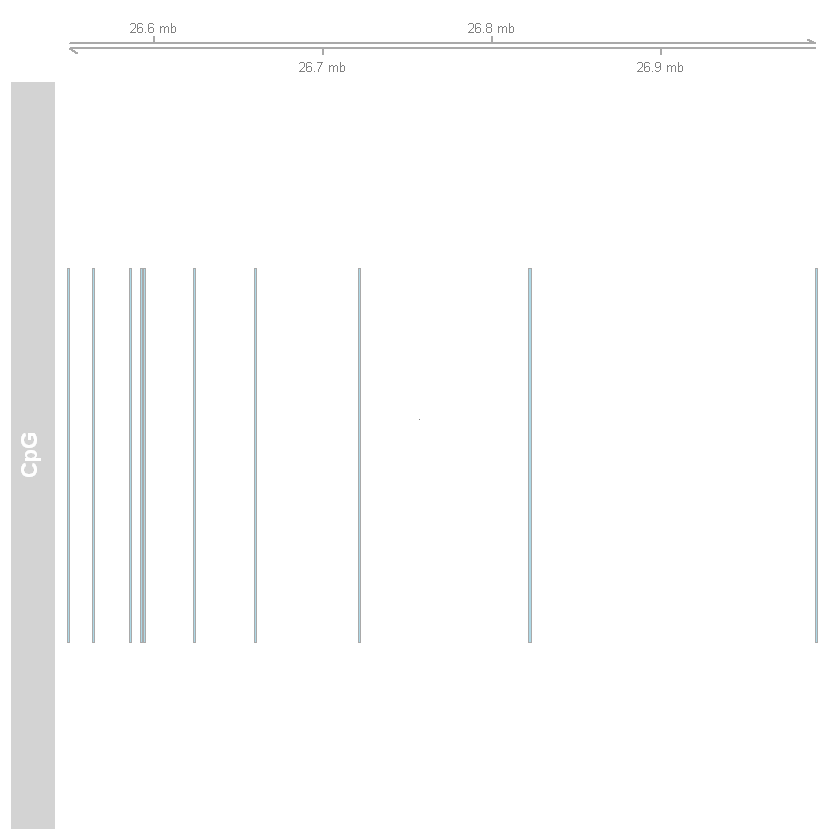

In [82]:
atrack <- AnnotationTrack(cpgIslands, name="CpG")
plotTracks(list(gtrack, atrack))

Followed by the ideogram track:

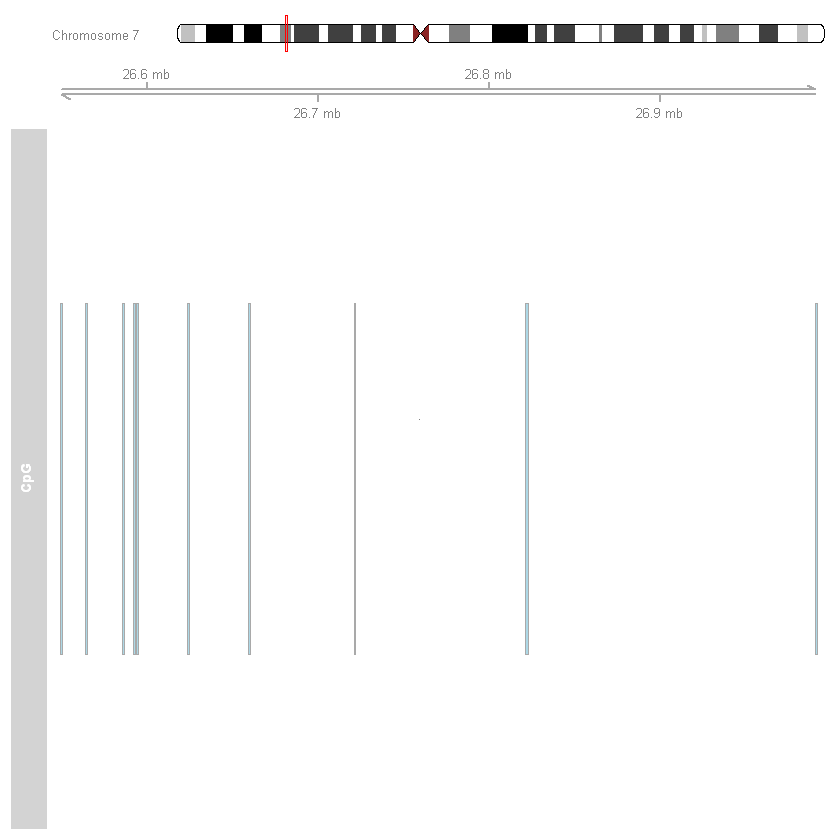

In [84]:
chr <- as.character(unique(seqnames(cpgIslands)))
gen <- genome(cpgIslands)
itrack <- IdeogramTrack(genome=gen, chromosome=chr)
plotTracks(list(itrack, gtrack, atrack))

Also, we can add a track with the different gene models in the same coordinates:

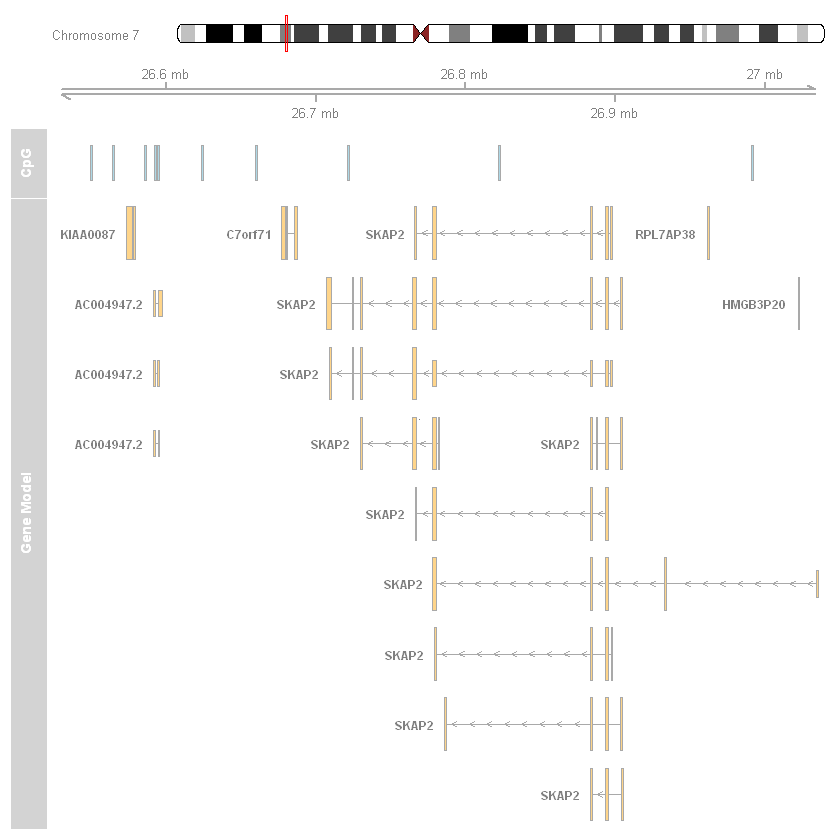

In [106]:
data(geneModels)
grtrack <- GeneRegionTrack(geneModels, genome=gen, chromosome=chr, name="Gene Model", transcriptAnnotation="symbol")
plotTracks(list(itrack, gtrack, atrack, grtrack))

We can also collapse all transcripts choosing, for example, the longest one:

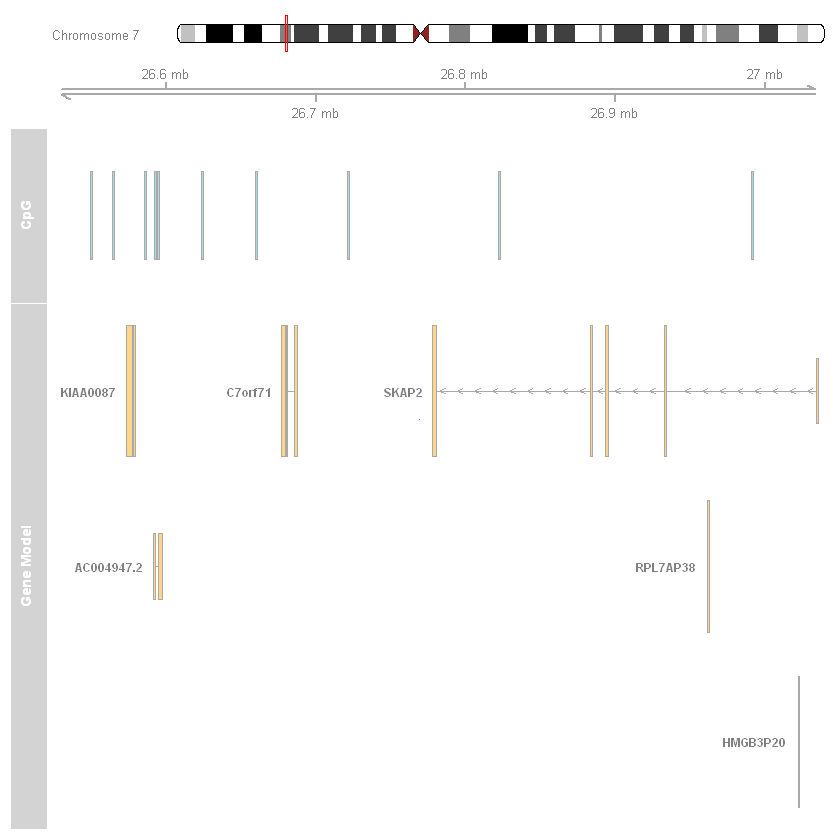

In [119]:
grtrack <- GeneRegionTrack(geneModels, genome=gen, chromosome=chr, name="Gene Model", transcriptAnnotation="symbol", collapseTranscripts="longest")
plotTracks(list(itrack, gtrack, atrack, grtrack))

Also, we can get this plot for a specific region:

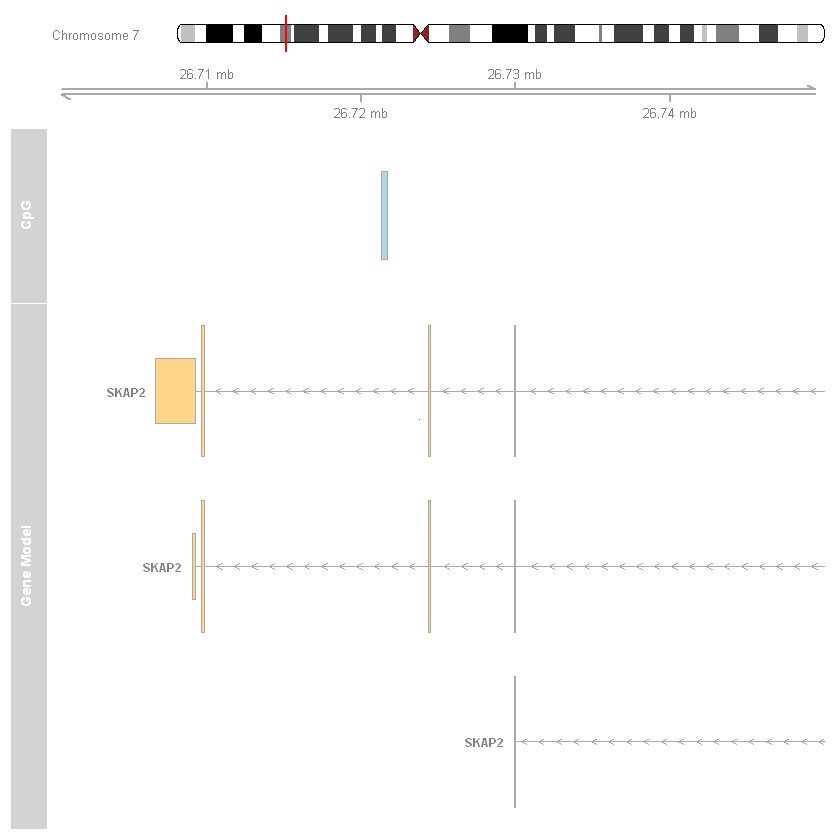

In [120]:
plotTracks(list(itrack, gtrack, atrack, grtrack), from=26700000, to=26750000, transcriptAnnotation="symbol", collapseTranscripts=FALSE)

And we can even add a sequence track, using BSgenome:

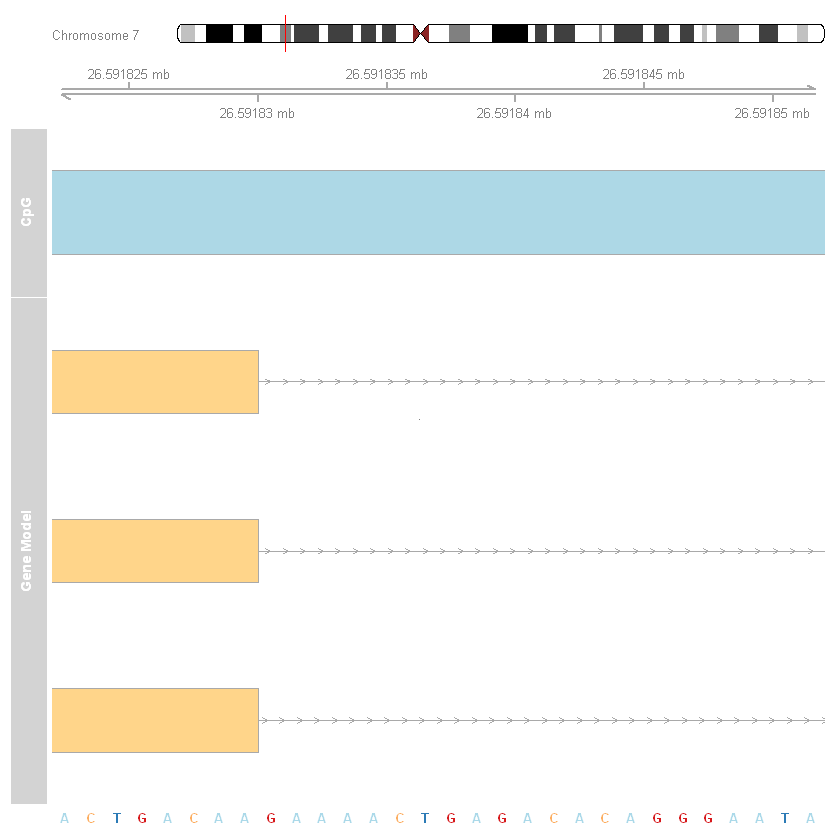

In [122]:
library(BSgenome.Hsapiens.UCSC.hg38, verbose=FALSE)
strack <- SequenceTrack(Hsapiens, chromosome=chr)
plotTracks(list(itrack, gtrack, atrack, grtrack, strack), from=26591822, to=26591852, cex=0.8, collapseTranscripts=FALSE)

Finally, Gviz can include quantitative data tracks. In the following example, a data track of random uniform data is added:

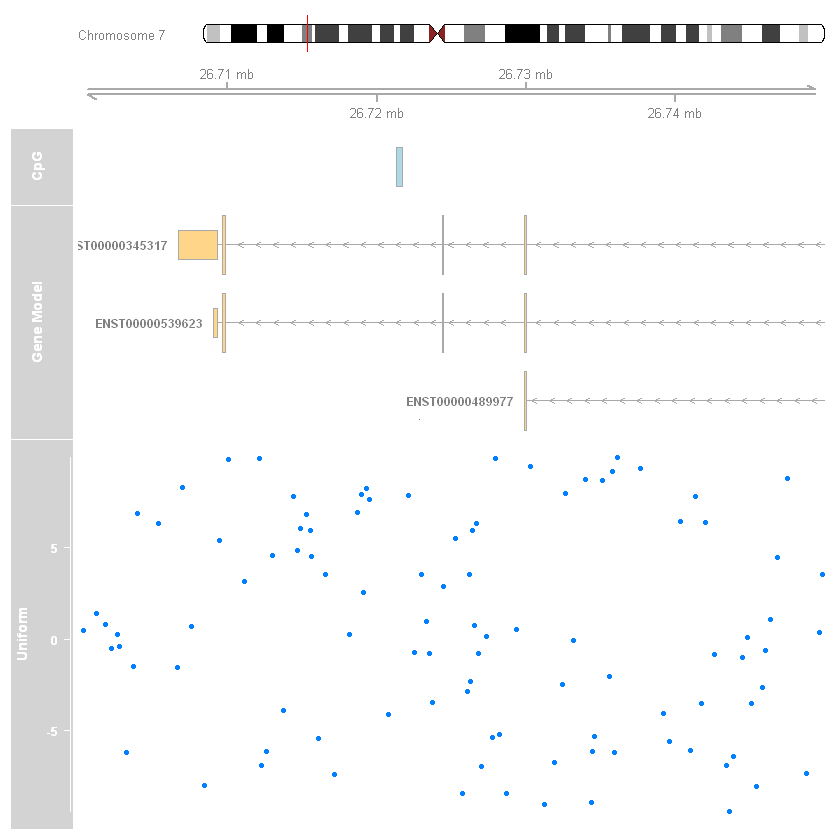

In [123]:
lim <- c(26700000, 26750000)
coords <- sort(c(lim[1], sample(seq(from=lim[1], to=lim[2]), 99), lim[2]))
set.seed(255)
dat <- runif(100, min=-10, max=10)
dtrack <- DataTrack(data=dat, start=coords[-length(coords)], end=coords[-1], chromosome=chr,
                    genome=gen, name="Uniform")
plotTracks(list(itrack, gtrack, atrack, grtrack, dtrack), from=lim[1], to=lim[2], transcriptAnnotation="transcript", collapseTranscripts=FALSE) # see that we changed the annotation from gene symbol to transcripts

We can also plot histograms. For the previous example:

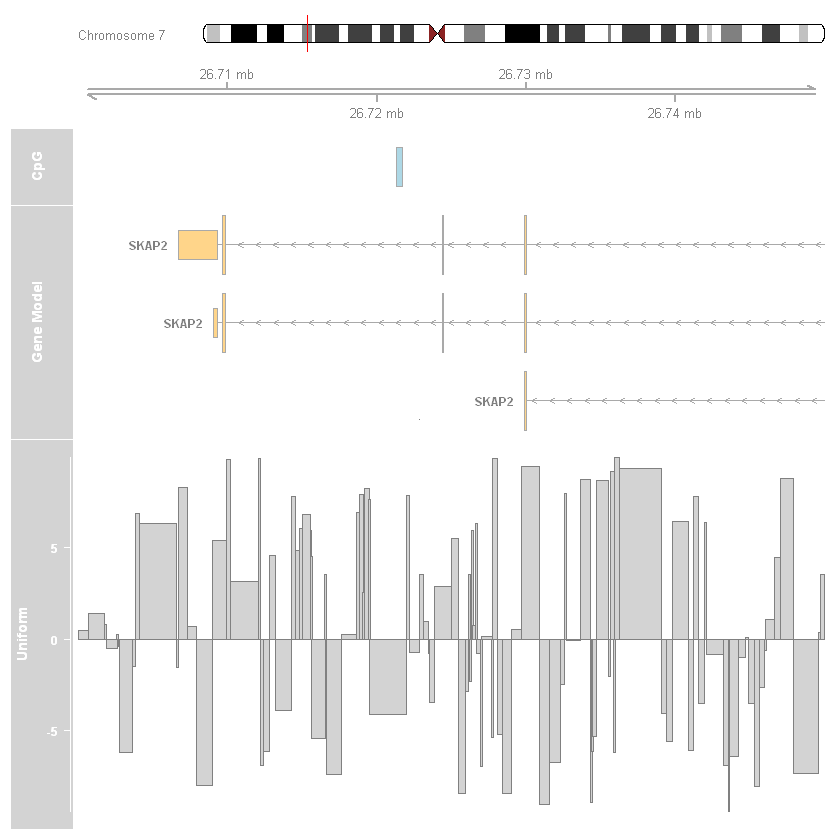

In [124]:
plotTracks(list(itrack, gtrack, atrack, grtrack, dtrack), from=lim[1], to=lim[2], type="histogram", transcriptAnnotation="symbol", collapseTranscripts=FALSE)

The following example shows us numeric information from control and treated samples of a set of genomic ranges:

In [93]:
data(twoGroups)
twoGroups

GRanges object with 25 ranges and 6 metadata columns:
       seqnames    ranges strand |           control          control.1
          <Rle> <IRanges>  <Rle> |         <numeric>          <numeric>
   [1]     chrX      1-30      * | -8.96125989500433  -7.65790161676705
   [2]     chrX     42-71      * |  -4.2114706709981    4.6882571419701
   [3]     chrX    84-113      * |  2.28711236733943   8.01326935179532
   [4]     chrX   125-154      * |  9.20983788557351  -6.23242623638362
   [5]     chrX   167-196      * | 0.406841854564846  -7.05442394595593
   ...      ...       ...    ... .               ...                ...
  [21]     chrX   833-862      * |  2.71242363378406   7.53853759262711
  [22]     chrX   875-904      * | 0.727043347433209 -0.950022372417152
  [23]     chrX   916-945      * |   7.3868807638064    4.8170017497614
  [24]     chrX   958-987      * | -5.54162500426173  -2.23117967601866
  [25]     chrX 1000-1029      * | -1.13912807777524   2.86112546455115
          

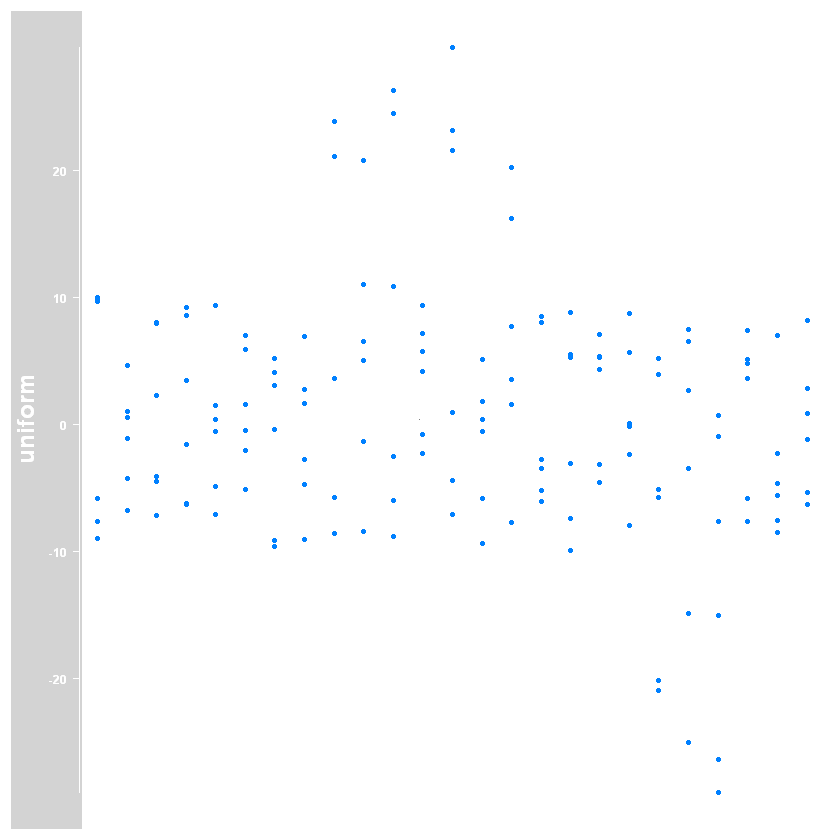

In [94]:
dTrack <- DataTrack(twoGroups, name="uniform")
plotTracks(dTrack)

The information in this example can be visualized using multiple types of plots, such as boxplots, heatmaps, line plots, and confidence intervals:

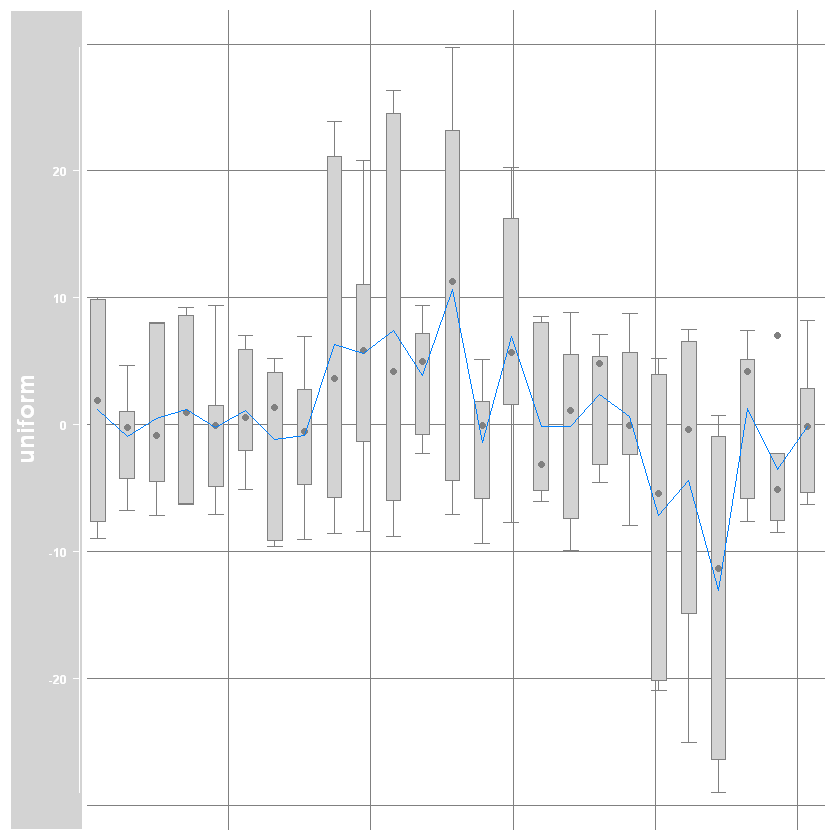

In [95]:
plotTracks(dTrack, type=c("boxplot", "a", "g"))

[1] "control"   "control.1" "control.2" "treated"   "treated.1" "treated.2"

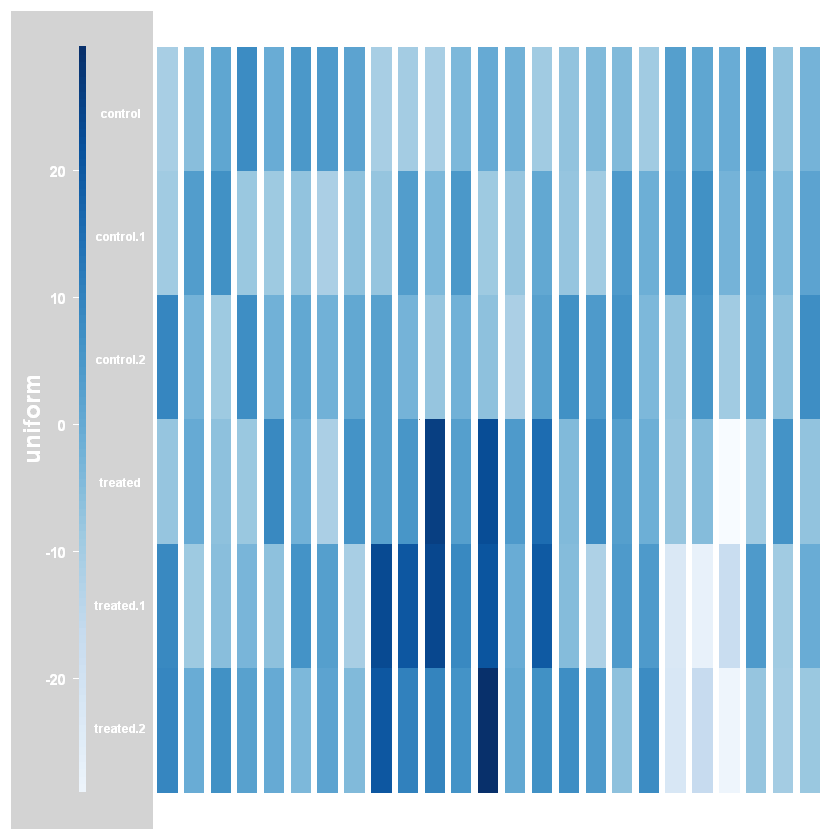

In [110]:
colnames(mcols(twoGroups))
plotTracks(dTrack, type=c("heatmap"), showSampleNames=TRUE, cex.sampleNames=0.6)

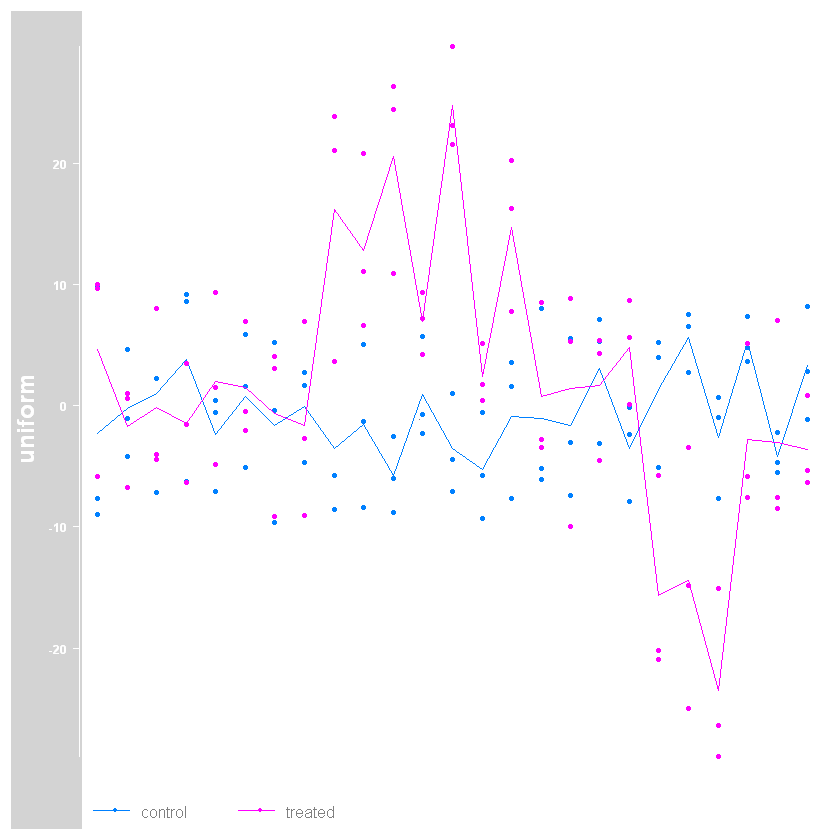

In [98]:
plotTracks(dTrack, groups=rep(c("control", "treated"), each=3), type=c("a", "p"), legend=TRUE)

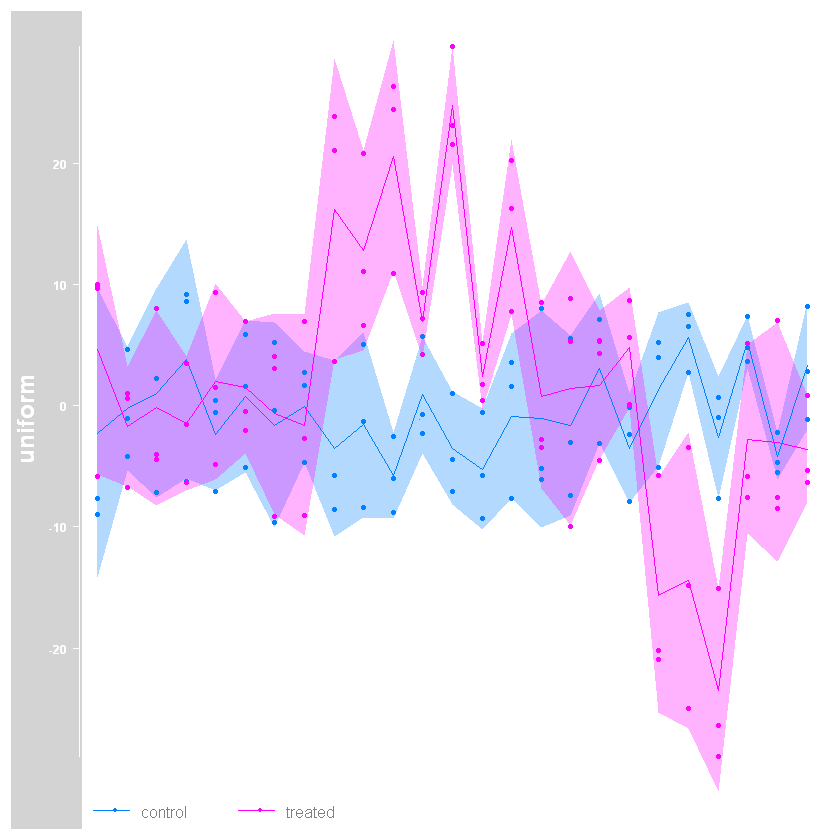

In [97]:
plotTracks(dTrack, groups=rep(c("control", "treated"), each=3), type=c("a", "p", "confint"))

Gviz has multiple additional plotting options that can be found in the documentation.

# References:

[1] https://bioconductor.org/packages/release/bioc/vignettes/AnnotationDbi/inst/doc/IntroToAnnotationPackages.pdf

[2] https://bioconductor.org/packages/release/bioc/vignettes/AnnotationHub/inst/doc/AnnotationHub.html

[3] https://bioconductor.org/packages/release/bioc/vignettes/rtracklayer/inst/doc/rtracklayer.pdf

[4] https://bioconductor.org/packages/release/bioc/vignettes/Gviz/inst/doc/Gviz.html